In [1]:
import matplotlib.pyplot as plt

In [2]:
import xarray as xr

In [10]:
f_cu = xr.open_dataset('/home/shasko/Desktop/internship_2025/evaluation_set/test_1_patterns_Cu_cubic_COD_peakslabeled_noisy.nc')

In [9]:
f_nacl = xr.open_dataset('/home/shasko/Desktop/internship_2025/evaluation_set/test_1_patterns_NaCl_cubic_peakslabeled_noisy.nc')

In [21]:
f_psn = xr.open_dataset('/home/shasko/Desktop/internship_2025/evaluation_set/test_1_patterns_PSn_tetragonal_COD_peakslabeled_noisy.nc')

In [29]:
f_multiphase_dans = xr.open_dataset('/home/shasko/Desktop/internship_2025/saved_data/ds_multiphase_dans_psn_nacl_1.nc')

In [6]:
f_additive = xr.open_dataset('/nsls2/users/shasko/Repos/internship_2025/saved_data/ds_additive_nacl_baso4_1.nc')

In [30]:
x = f_multiphase_dans['x'].values

cu_inten = f_cu['Intensities'].values
nacl_inten = f_nacl['Intensities'].values
psn_inten = f_psn['Intensities'].values
multi_inten = f_multiphase_dans['Intensities'].values
# add_inten = f_additive['AddedIntensities'].values

In [14]:
%matplotlib widget

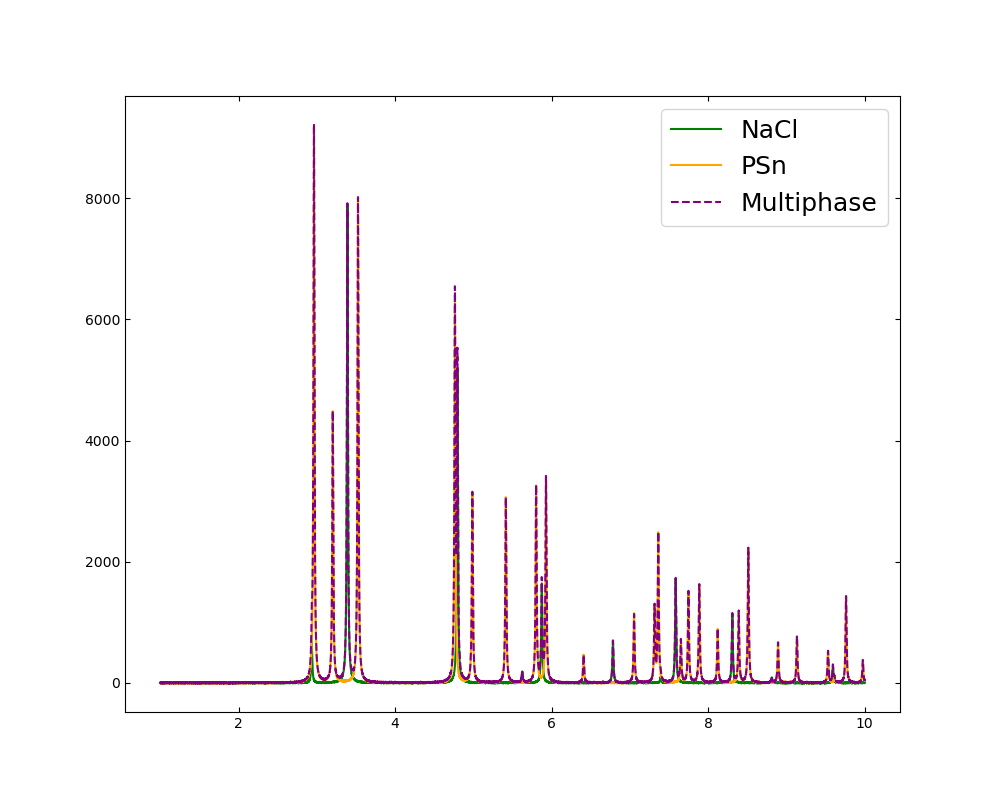

In [36]:
plt.figure(figsize=(10,8))

plt.plot(x, nacl_inten[0], color='green', label='NaCl')
plt.plot(x, psn_inten[0], color='orange', label='PSn')

plt.plot(x, multi_inten[0], color='purple', linestyle='--', label='Multiphase')

plt.legend(fontsize=18)
plt.tick_params(axis='both', direction='in', top=True, right=True)
plt.savefig('/home/shasko/Desktop/internship_2025/saved_figures/multiphase_for_poster.png')
plt.show()

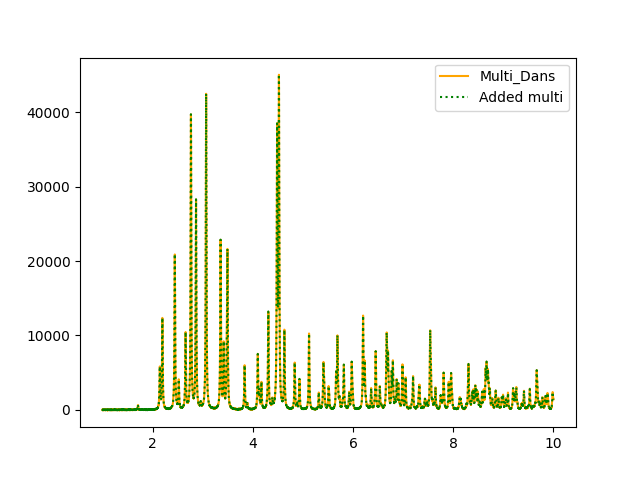

In [14]:
plt.figure()
# plt.plot(x, nacl_inten[0], color='black', label='NaCl')
# plt.plot(x, baso4_inten[0], color='purple', label='baso4')

plt.plot(x, multi_inten[0], color='orange', label='Multi_Dans')
plt.plot(x, add_inten[0], color='green', label='Added multi', linestyle=":")
plt.legend()
plt.show()

Experimental Data Vis

In [3]:
import pandas as pd
import sys, os

In [ ]:
path = '/home/shasko/Downloads/standard_patterns_for_Sonia/xrd_jogged'
file = 'xrd_Ni_std_brac1_20250720-194434_7d7ebd_primary-1_mean_tth.chi'
pattern = pd.read_csv(os.path.join(path,file), delimiter='\s+', header=None, skiprows=1, names=['tth','intensity'])

(4096,)
(4096,)


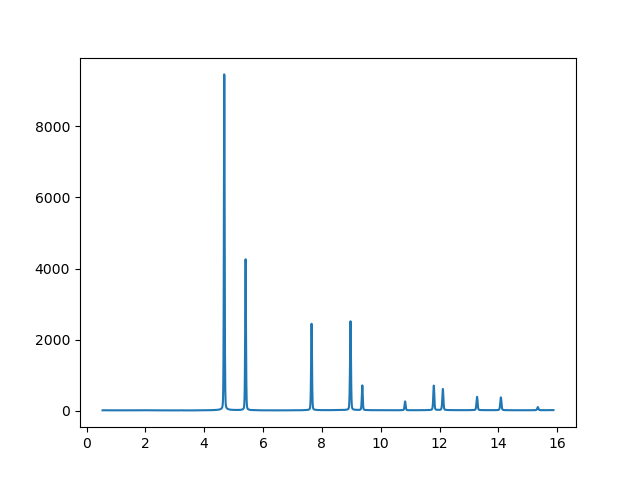

In [44]:
plt.figure()
tth_exp = pattern['tth']
inten_exp = pattern['intensity']
print(tth_exp.shape)
print(inten_exp.shape)
plt.plot(tth_exp, inten_exp)
plt.show()

In [51]:
import numpy as np
file = '/home/shasko/Downloads/standard_patterns_for_Sonia/xrd_jogged/xrd_Ni_std_brac1_20250720-194434_7d7ebd_primary-1_mean_tth.chi'
pattern = pd.read_csv(os.path.join(file), delimiter='\s+', header=None, skiprows=1, names=['tth','intensity'])

tth_exp = pattern['tth']
inten_exp = pattern['intensity']
tth_exp = np.array(tth_exp)
inten_exp = np.array(inten_exp)
window_size = tth_exp.shape[0]


In [ ]:
# Scale the data
inten_exp_sc = np.zeros_like(inten_exp)

for j in range(inten_exp.shape[0]):
    max_inten = np.max(inten_exp[j])
    min_inten = np.min(inten_exp[j])
    inten_exp_sc[j] = (inten_exp[j] - min_inten) / (max_inten - min_inten)

print(inten_exp_sc.shape[0], inten_exp_sc.shape[1],)
inten_exp_reshaped = inten_exp_sc.reshape(inten_exp_sc.shape[0], inten_exp_sc.shape[1], 1)

/tmp/ipykernel_26310/2041897901.py:7: RuntimeWarning: invalid value encountered in scalar divide
  inten_exp_sc[j] = (inten_exp[j] - min_inten) / (max_inten - min_inten)


IndexError: tuple index out of range

In [107]:
files = ['/home/shasko/Downloads/standard_patterns_for_Sonia/xrd_jogged/xrd_Ni_std_brac1_20250720-194434_7d7ebd_primary-1_mean_tth.chi',
         '/home/shasko/Downloads/standard_patterns_for_Sonia/xrd_jogged/xrd_Ni_std_brac1_20250721-000840_b6458b_primary-1_mean_tth.chi',
         '/home/shasko/Downloads/standard_patterns_for_Sonia/xrd_jogged/xrd_Ni_std_brac1_20250721-043248_1fec02_primary-1_mean_tth.chi']

#patterns = [pd.read_csv(os.path.join(file), delimiter='\s+', header=None, skiprows=1, names=['tth','intensity']) for file in files]

intens = [pd.read_csv(os.path.join(file), delimiter='\s+', header=None, skiprows=1)[1].values for file in files]
tth = [pd.read_csv(os.path.join(file), delimiter='\s+', header=None, skiprows=1)[0].values for file in files]


#intens = [np.array(patterns[0]['intensity']), np.array(patterns[1]['intensity']), np.array(patterns[2]['intensity'])]
#tth = [patterns[0]['tth'], patterns[1]['tth'], patterns[2]['tth']]


In [108]:

tth_exp_unpadded = np.mean(tth, axis=0)
inten_exp_unpadded = np.mean(intens, axis=0)


In [109]:

# tth_exp = pattern['tth']
# inten_exp = pattern['intensity']
tth_exp_unpadded = np.array(tth_exp_unpadded)
inten_exp_unpadded = np.array(inten_exp_unpadded)

tth_exp = np.zeros((11837, ))
inten_exp = np.zeros((11837, ))


In [110]:

for i in range(tth_exp_unpadded.shape[0]):
    tth_exp[i] = tth_exp_unpadded[i]


In [111]:
tth_exp_unpadded

array([ 0.54330802,  0.54705157,  0.55079512, ..., 15.86565556,
       15.86939911, 15.87314265])

In [112]:
tth_exp

array([0.54330802, 0.54705157, 0.55079512, ..., 0.        , 0.        ,
       0.        ])

In [114]:
inten_exp_unpadded.shape[0]

4096

In [115]:
inten_exp_unpadded.shape

(4096,)

In [116]:
inten_exp_unpadded[0]

np.float64(14.180169105529785)

In [119]:
for i in range(inten_exp_unpadded.shape[0]):
    inten_exp[i] = inten_exp_unpadded[i]

In [121]:
inten_exp = inten_exp.reshape(1, inten_exp.shape[0])

In [129]:
tth_exp = np.linspace(1,10,11837)

In [130]:
tth_exp

array([ 1.        ,  1.00076039,  1.00152078, ...,  9.99847922,
        9.99923961, 10.        ])

In [132]:
tth_exp.shape

(11837,)

In [125]:

path = '/home/shasko/Desktop/internship_2025/'
filenames = [
             'saved_data/gaussian_functions_small_var_amp_noisy_11837_stddevamp.nc',
             'saved_data/gaussian_functions_medium_var_amp_noisy_11837_stddevamp.nc',
             'saved_data/gaussian_functions_large_var_amp_noisy_11837_stddevamp.nc',
             'saved_data/gaussian_functions_very_large_var_amp_noisy_11837_stddevamp.nc',
             'saved_data/lorentzian_functions_small_var_amps_noisy_11837_3000.nc',
             'saved_data/lorentzian_functions_medium_var_amps_noisy_11837_3000.nc',
             'saved_data/lorentzian_functions_large_var_amps_noisy_11837_3000.nc',
             'saved_data/lorentzian_functions_very_large_var_amps_noisy_11837_3000.nc',
             'saved_data/psuedovoigt_functions_small_var_amps_noisy_11837_3000.nc',
             'saved_data/psuedovoigt_functions_medium_var_amps_noisy_11837_3000.nc',
             'saved_data/psuedovoigt_functions_large_var_amps_noisy_11837_3000.nc',
             'saved_data/psuedovoigt_functions_very_large_var_amps_noisy_11837_3000.nc',
             'saved_data/asymmetric_functions_small_noisy.nc',
             'saved_data/asymmetric_functions_medium_noisy.nc',
             'saved_data/asymmetric_functions_large_noisy.nc',
             'saved_data/asymmetric_functions_very_large_noisy.nc'
             ]
trial = f'8_n_batch_{64}'
             
# List comprehension to get all path names
full_paths = [f'{path}{i}' for i in filenames]
all_datasets = [xr.open_dataset(p, engine='netcdf4') for p in full_paths] # list of all the Datasets

combined = xr.concat(all_datasets, dim="pattern")
window_size = combined["x"].shape[0]
gaussians = combined["Intensities"]
binary = combined["BinaryArr"]
x = combined["x"].values

In [128]:
x

array([ 1.        ,  1.00076039,  1.00152078, ...,  9.99847922,
        9.99923961, 10.        ])

In [127]:
x.shape

(11837,)

Dan's data from another lab for LaB6

In [9]:
import numpy as np
import csv

In [91]:
file = '/home/shasko/Downloads/LaB6.xye'


def read_xye_delimited(filepath, delimiter=' '):
    x_values = []
    y_values = []
    e_values = []
    with open(filepath, 'r') as f:
        reader = csv.reader(f, delimiter=delimiter)
        for row in reader:
            if len(row) == 4:  # Ensure there are three columns (X, Y, E)
                try:
                    x_values.append(float(row[1]))
                    y_values.append(float(row[2]))
                    e_values.append(float(row[3]))
                except ValueError:
                    print(f"Skipping malformed row: {row}")
    return x_values, y_values, e_values


x, y, e = read_xye_delimited(f'{file}', delimiter=' ')

Skipping malformed row: ['#', 'No', '2Theta', 'correction']


In [92]:
%matplotlib widget

<function matplotlib.pyplot.show(block=None)>

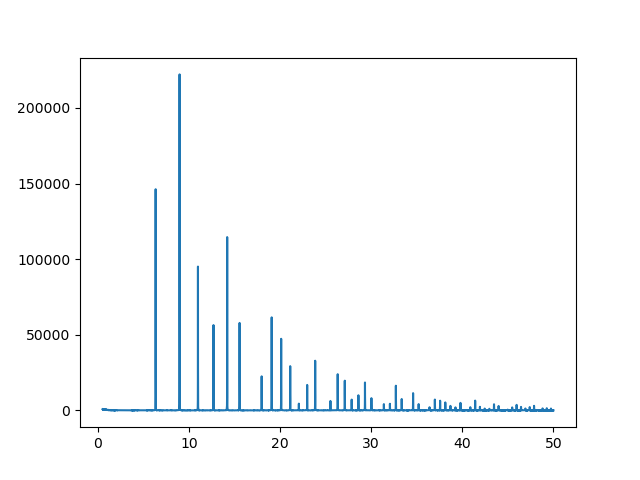

In [93]:
plt.figure()
plt.plot(x, y)
plt.show

In [95]:
len(x)

49574

In [85]:
x = np.array(x)
x_rescaled = 1 + (x / 50) * 9

bins_custom = np.linspace(1, 10, 11837)

# Bin x and aggregate y values per bin
df = pd.DataFrame({'x_rescaled': x_rescaled, 'y': y})
df['x_bin'] = pd.cut(df['x_rescaled'], bins=bins_custom)

# Aggregate (e.g. average y per bin)
binned_df = df.groupby('x_bin').agg({'x_rescaled': 'mean', 'y': 'mean'}).dropna()

# Final binned x and y values
x_binned = binned_df['x_rescaled'].values
y_binned = binned_df['y'].values


/tmp/ipykernel_102099/899327171.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_df = df.groupby('x_bin').agg({'x_rescaled': 'mean', 'y': 'mean'}).dropna()


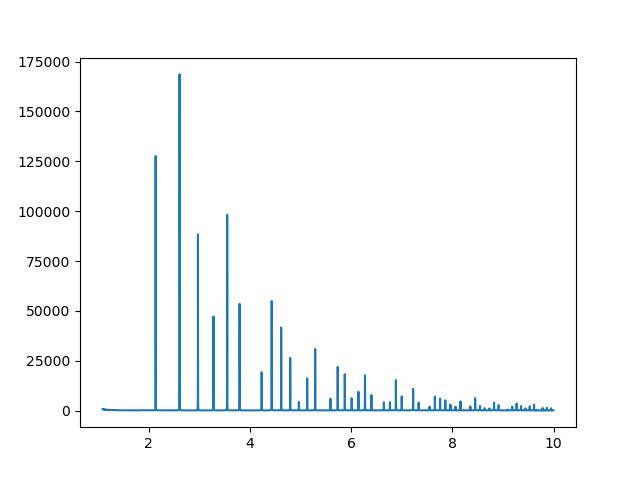

In [86]:
plt.figure()
plt.plot(x_binned, y_binned)
plt.show()



In [87]:
binned_df.to_csv('/home/shasko/Downloads/LaB6_from_Dan_rebinned.csv', index=False)

In [88]:
print(binned_df.head())
print(binned_df.columns)


                  x_rescaled           y
x_bin                                   
(1.0897, 1.0905]    1.090180  785.081002
(1.0905, 1.0912]    1.090809  780.674903
(1.0912, 1.092]     1.091617  758.234489
(1.092, 1.0928]     1.092426  741.466119
(1.0928, 1.0935]    1.093145  742.394740
Index(['x_rescaled', 'y'], dtype='object')


In [89]:
df = pd.read_csv('/home/shasko/Downloads/LaB6_from_Dan_rebinned.csv')  # No need for delimiter, header=None, or skiprows
x = df['x_rescaled'].values
y = df['y'].values


In [90]:
[x]
x.shape

(11717,)

In [76]:
files_wo_path = [
                'LaB6_brac1_xrd_calib_20250720-183936_bdf715_primary-1_mean_tth.chi',
                ]
path = '/home/shasko/Downloads/standard_patterns_for_Sonia'
files = [f'{path}/{filename}' for filename in files_wo_path]
intens = [pd.read_csv(os.path.join(file), delimiter='\s+', header=None, skiprows=1)[1].values for file in files]
tth = [pd.read_csv(os.path.join(file), delimiter='\s+', header=None, skiprows=1)[0].values for file in files]

In [77]:
tth

[array([ 0.54330802,  0.54705157,  0.55079512, ..., 15.86565556,
        15.86939911, 15.87314265])]

Calculate performance score based on the residual (i.e., true labels - predicted labels)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load in and read LaB6 data
def eval_LaB6():    
    files = ['/home/shasko/Downloads/patterns_for_sonia/LaB6_brac1_xrd_calib_20250720-183936_bdf715_primary-1_mean_tth.chi']
    intens = [pd.read_csv(f, delim_whitespace=True, header=None, skiprows=1)[1].values for f in files]
    tth = [pd.read_csv(f, delim_whitespace=True, header=None, skiprows=1)[0].values for f in files]

    tth_exp_unpadded = np.mean(tth, axis=0)
    inten_exp_unpadded = np.mean(intens, axis=0)

    tth_exp_unpadded = np.array(tth_exp_unpadded)
    inten_exp_unpadded = np.array(inten_exp_unpadded)

    inten_exp = np.zeros((11837, ))

    tth_exp = np.linspace(1,10,11837)
    print(inten_exp_unpadded.shape)

    for i in range(inten_exp_unpadded.shape[0]):
        inten_exp[i] = inten_exp_unpadded[i]
    inten_exp = inten_exp.reshape(1, inten_exp.shape[0])

    window_size = tth_exp.shape[0]

    # Scale the data
    inten_exp_sc = np.zeros_like(inten_exp)

    for j in range(inten_exp.shape[0]):
        max_inten = np.max(inten_exp[j])
        min_inten = np.min(inten_exp[j])
        inten_exp_sc[j] = (inten_exp[j] - min_inten) / (max_inten - min_inten)

    inten_exp_reshaped = inten_exp_sc.reshape(inten_exp_sc.shape[0], inten_exp_sc.shape[1], 1)

    return tth_exp, inten_exp_reshaped

LaB6_tth_exp, LaB6_inten_exp_reshaped = eval_LaB6()




(4096,)


/tmp/ipykernel_113695/32556953.py:8: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

/tmp/ipykernel_113695/32556953.py:9: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



In [3]:
%matplotlib widget

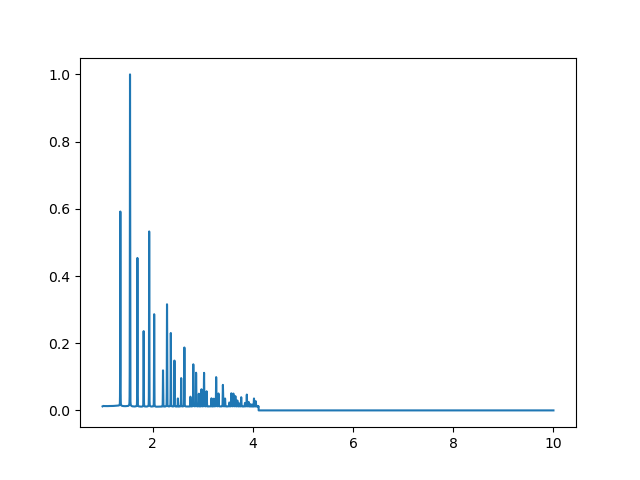

In [4]:
plt.figure()
plt.plot(LaB6_tth_exp, LaB6_inten_exp_reshaped[0])

In [ ]:
peak_x_values = [[1.353, 1.357], [1.545, 1.550], [1.693, 1.685], [1.818, 1.823], [1.9285, 1.933], [2.075, 2.0325], [2.204, 2.209], [2.285, 2.289], [2.360, 2.365], [2.432, 2.437], [2.501, 2.506], [2.567, 2.572], [2.6305, 2.6355], [2.751, 2.756], [2.809, 2.8135], 
[2.865, 2.869], [2.919, 2.924], [2.972, 2.977], [3.024, 3.028],  [3.074, 3.079], [3.171, 3.177], [3.219, 3.224], [3.265, 3.270], [3.311, 3.316], [3.4, 3.404], [3.442, 3.448], [3.526, 3.532], [3.567, 3.574], [3.608, 3.614], [3.648, 3.654], [3.687, 3.694], [3.726, 3.7325], 
[3.764, 3.771], [3.839, 3.847], [3.876, 3.883], [3.912, 3.920], [3.949, 3.955], [3.984, 3.991], [4.020, 4.026], [4.054, 4.061]]


In [ ]:
peak_x_values = [
    [1.353, 1.357], [1.545, 1.550], [1.693, 1.685], [1.818, 1.823],
    [1.9285, 1.933], [2.0275, 2.0340], [2.204, 2.209], [2.285, 2.289],
    [2.360, 2.365], [2.432, 2.437], [2.501, 2.506], [2.567, 2.572],
    [2.6305, 2.6355], [2.751, 2.756], [2.809, 2.8135], [2.865, 2.869],
    [2.919, 2.924], [2.972, 2.977], [3.024, 3.028], [3.074, 3.079],
    [3.171, 3.177], [3.219, 3.224], [3.265, 3.270], [3.311, 3.316],
    [3.4, 3.404], [3.442, 3.448], [3.526, 3.532], [3.567, 3.574],
    [3.608, 3.614], [3.648, 3.654], [3.687, 3.694], [3.726, 3.7325],
    [3.764, 3.771], [3.839, 3.847], [3.876, 3.883], [3.912, 3.920],
    [3.949, 3.955], [3.984, 3.991], [4.020, 4.026], [4.054, 4.061]
]

# Ensure each range is sorted (to correct any flipped ranges)
peak_ranges = [sorted(rng) for rng in peak_x_values]

# Initialize labels
LaB6_true_labels = np.zeros_like(LaB6_tth_exp, dtype=int)

# Label all x values that fall within any of the peak ranges
for low, high in peak_ranges:
    mask = (LaB6_tth_exp >= low) & (LaB6_tth_exp <= high)
    LaB6_true_labels[mask] = 1

In [22]:
LaB6_inten_exp_reshaped.shape

(1, 11837, 1)

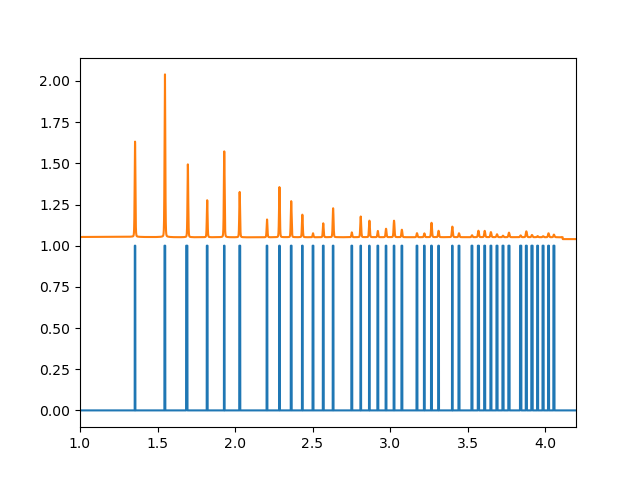

In [ ]:
plt.figure()
plt.plot(LaB6_tth_exp, LaB6_true_labels)
plt.plot(LaB6_tth_exp, LaB6_inten_exp_reshaped[0] + 1.04)
plt.xlim(1,4.2)
plt.show()

In [21]:
LaB6_true_labels.shape

(11837,)

In [ ]:
residual = predictions[0] - LaB6_true_labels
print(residual)
sum_residual = np.sum(residual)
print(sum_residual)

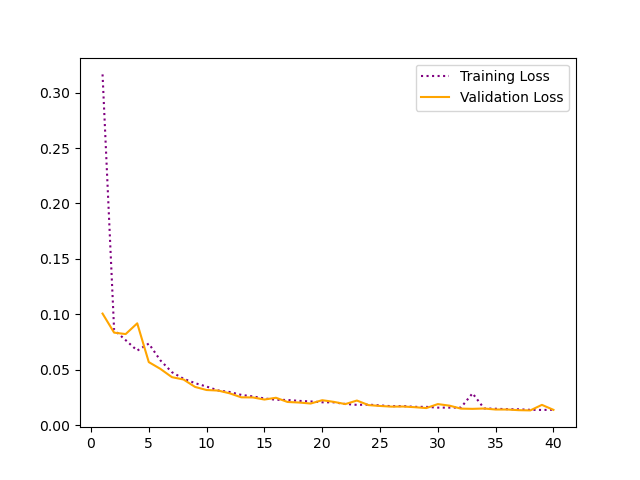

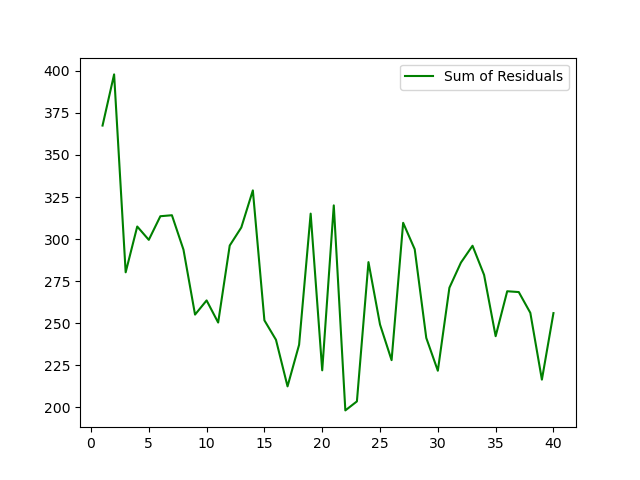

In [95]:
plt.figure()
train_loss = [0.3165, 0.0859, 0.0766, 0.0672, 0.0735, 0.0584, 0.0477, 0.0418, 0.0378, 0.0347, 0.0312, 0.0298, 0.0272, 0.0258, 0.0240, 0.0228, 0.0226, 0.0218, 0.0213, 0.0205, 0.0205, 0.0190, 0.0182, 0.0184, 0.0177, 0.0170, 0.0171,
              0.0164, 0.0164, 0.0157, 0.0157, 0.0158, 0.0286, 0.0150, 0.0147, 0.0143, 0.0142, 0.0137, 0.0136, 0.0138]
val_loss = [0.1006, 0.0834, 0.0821, 0.0918, 0.0568, 0.0507, 0.0432, 0.0411, 0.0344, 0.0316, 0.0311, 0.0286, 0.0250, 0.0249, 0.0230, 0.0246, 0.0208, 0.0203, 0.0194, 0.0224, 0.0209, 0.0189, 0.0221, 0.0180, 0.0172, 0.0166, 0.0167,
            0.0161, 0.0153, 0.0189, 0.0175, 0.0148, 0.0146, 0.0149, 0.0140, 0.0140, 0.0134, 0.0132, 0.0182, 0.0137]
sum_residuals = [367.44551250713994, 397.83855106390547, 280.2835782254406, 307.4765576090431, 299.55964379348006, 313.5868676776081, 314.1805729473599, 293.72877695783063, 255.15480312724685, 263.5689048101967, 250.4411525277792,
                 296.17841770473046, 306.8906354917681, 328.9486577448679, 251.7376051354139, 240.1825127975079, 212.52405007479427, 237.2281128183338, 315.13523617142755, 222.04574406399743, 320.03879383822294, 198.2482854675996,
                203.58951887166205, 286.32982928150983, 249.2428159306786, 228.093644144288, 309.6794648096273, 293.9819797686619, 241.30079611868453, 221.80960085938943, 271.10661753729164, 286.07898733367904, 296.0517949463682,
                278.73237205742186, 242.32144027988122, 269.0259917404922, 268.5403541998345, 256.19037073698, 216.5129240075206, 256.0483214092474]



epochs = np.arange(1, 41, 1)

plt.plot(epochs, train_loss, linestyle=':', color='purple', label='Training Loss')
plt.plot(epochs, val_loss, color='orange', label='Validation Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, sum_residuals, color='green', label='Sum of Residuals')
plt.legend()
plt.show()

In [12]:
import xarray as xr

# Open the file
file_path = "/home/shasko/Desktop/internship_2025/saved_results_only_analytical_9_continued.nc"
dataset = xr.open_dataset(file_path)

true_labels = dataset["true_y"].values
predicted_labels = dataset["predicted_y"].values
intensities = dataset["test_intensities"].values
x = dataset['x'].values

In [23]:
%matplotlib widget

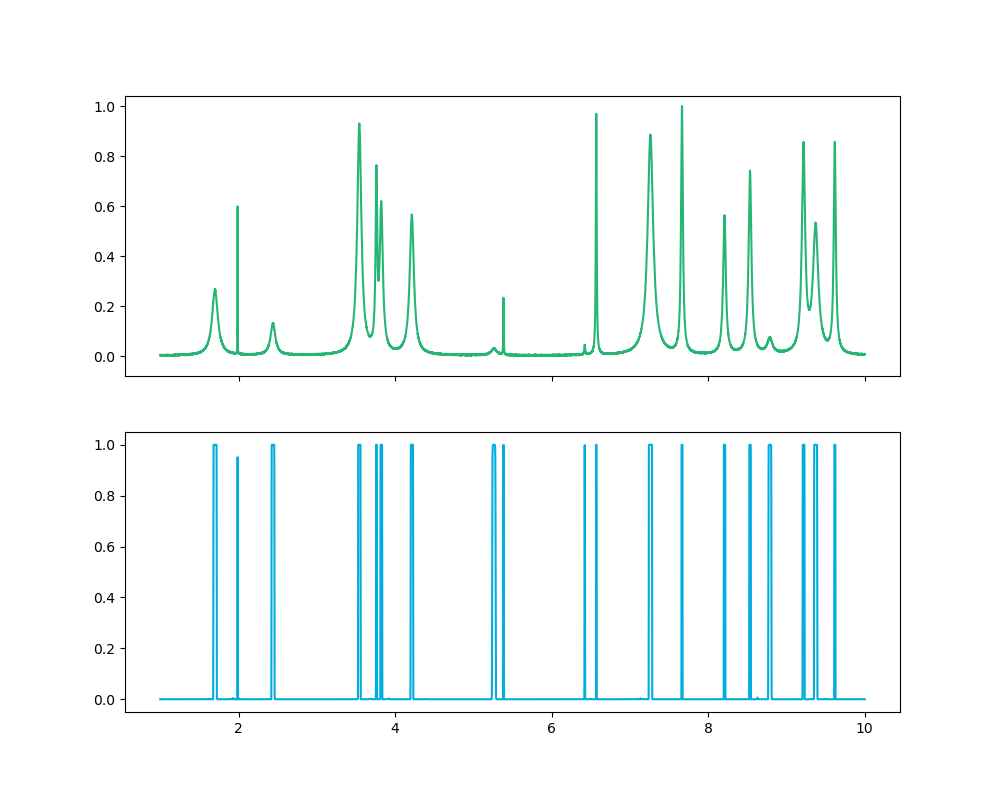

In [74]:
import matplotlib.pyplot as plt
import numpy as np
i = np.random.randint(0,4800) 

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,8))

axs[1].plot(x, predicted_labels[i], color='#00ADDC')
axs[0].plot(x, intensities[i], color='#25B574')
axs[0].set_ylim(-0.08, 1.04)
plt.show()

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:

df = pd.read_csv('/home/shasko/Downloads/ExSituXRDdata/Cu_NPM_600Cannealed_XRD.txt', delim_whitespace=True)

# Extract columns
tth = df.iloc[:, 0].tolist()  # tth
inten = df.iloc[:, 1].tolist()  # inten


/tmp/ipykernel_7489/3827978204.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/home/shasko/Downloads/ExSituXRDdata/Cu_NPM_600Cannealed_XRD.txt', delim_whitespace=True)


In [91]:

files = ['/home/shasko/Downloads/patterns_for_sonia/Cu_NPM_600Cannealed_XRD.txt']

intens = [pd.read_csv(f, delim_whitespace=True, header=None, skiprows=1)[1].values for f in files]
tth = [pd.read_csv(f, delim_whitespace=True, header=None, skiprows=1)[0].values for f in files]

/tmp/ipykernel_7489/2042982098.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  intens = [pd.read_csv(f, delim_whitespace=True, header=None, skiprows=1)[1].values for f in files]
/tmp/ipykernel_7489/2042982098.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  tth = [pd.read_csv(f, delim_whitespace=True, header=None, skiprows=1)[0].values for f in files]


In [92]:
intens

[array([95888.774114, 94531.618057, 95980.628494, ..., 26501.507335,
        26514.339173, 26601.497484])]

In [133]:
import xarray as xr

file = 'saved_results_only_analytical_9.nc'
ds = xr.open_dataset(file)

In [134]:
true_y = ds['true_y'].values

In [135]:
true_y[0].shape

(11837, 1)

In [136]:
pred_y = ds['predicted_y'].values

In [118]:
diff = true_y[0] - pred_y[0]
print(diff.shape)

(11837, 1)


In [119]:
true_y.shape

(4800, 11837, 1)

In [120]:
pred_y.shape

(4800, 11837, 1)

In [125]:
all_means = []

for i in range(true_y.shape[0]):
    differences = np.abs(true_y[i] - pred_y[i])
    mean = np.mean(differences)
    all_means.append(mean)


In [127]:
print(np.mean(all_means))

0.010528983990224231


In [128]:
print(np.std(all_means))

0.008313766820812672
